Unsupervised Learning Project subbmitted by Akhilesh Rzadan

Part 1

In [1]:
#importing required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans 
# importing the StandardScaler Module
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.ticker as mtick # For specifying the axes tick format 
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.decomposition import PCA

In [2]:
#Read ‘Car name.csv’ as a DataFrame and assign it to a variable
dataframe1= pd.read_csv("Car name.csv")
#. Read ‘Car-Attributes.json as a DataFrame and assign it to a variable
dataframe2= pd.read_json("Car-Attributes.json")
#display dataframe1 values
dataframe1.head(5)

,car_name
0,chevrolet chevelle malibu
1,buick skylark 320
2,plymouth satellite
3,amc rebel sst
4,ford torino


In [3]:
#display dataframe2 values
dataframe2.head(5)

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [4]:
#Merge both the DataFrames together to form a single DataFrame
dataframe=pd.merge(dataframe1, dataframe2, left_index=True, right_index=True)
#display dataframe1= merged values
dataframe.head(5)

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [5]:
# point summary of the numerical features and share insights
dataframe.describe()

,mpg,cyl,disp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


Observations:
From the count its clear that there is no NaN Values, MPG seems to be normally distributed, cyl has no outliers, disp is left skewed and might have some oultliers. wt, acc and yr is normally distributed and origin seems to be a catalogical variable. distributed

In [6]:
#Check and print feature-wise percentage of missing values present in the data and impute with the best suitable approach
(((dataframe.isna().sum())/398)*100)
#As there are no null values no need for imputation

car_name    0.0
mpg         0.0
cyl         0.0
disp        0.0
hp          0.0
wt          0.0
acc         0.0
yr          0.0
origin      0.0
dtype: float64

In [7]:
#Check for unexpected values
dataframe=dataframe.replace('na', np.NaN)
dataframe['hp']= dataframe['hp'].replace('?', np.NaN)
dataframe=dataframe.replace('NA', np.NaN)
dataframe=dataframe.replace('N.A.', np.NaN)
dataframe=dataframe.replace('n/a', np.NaN)
dataframe=dataframe.replace('-', np.NaN)
dataframe=dataframe.replace('--', np.NaN)
dataframe=dataframe.replace(r'^\s*$', np.NaN, regex=True)
#checking replacing unexpected values
(((dataframe.isna().sum())/398)*100)

car_name    0.000000
mpg         0.000000
cyl         0.000000
disp        0.000000
hp          1.507538
wt          0.000000
acc         0.000000
yr          0.000000
origin      0.000000
dtype: float64

In [8]:
# replacing unexpected values to median as no need to drop rows
dataframe.fillna(dataframe['hp'].median(), inplace=True)
(((dataframe.isna().sum())/398)*100)

car_name    0.0
mpg         0.0
cyl         0.0
disp        0.0
hp          0.0
wt          0.0
acc         0.0
yr          0.0
origin      0.0
dtype: float64

? was replace via median this help in having copule of more records and minimum noise as ? value was replaced via median.

In [9]:
#finding number of duplicate rows in dataframe
dataframe.duplicated().sum()

0

In [10]:
# duplicate values in the data
dataframe[dataframe.duplicated(keep = 'last')]

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin


Hence no rows with duplicate data are present in dataframe

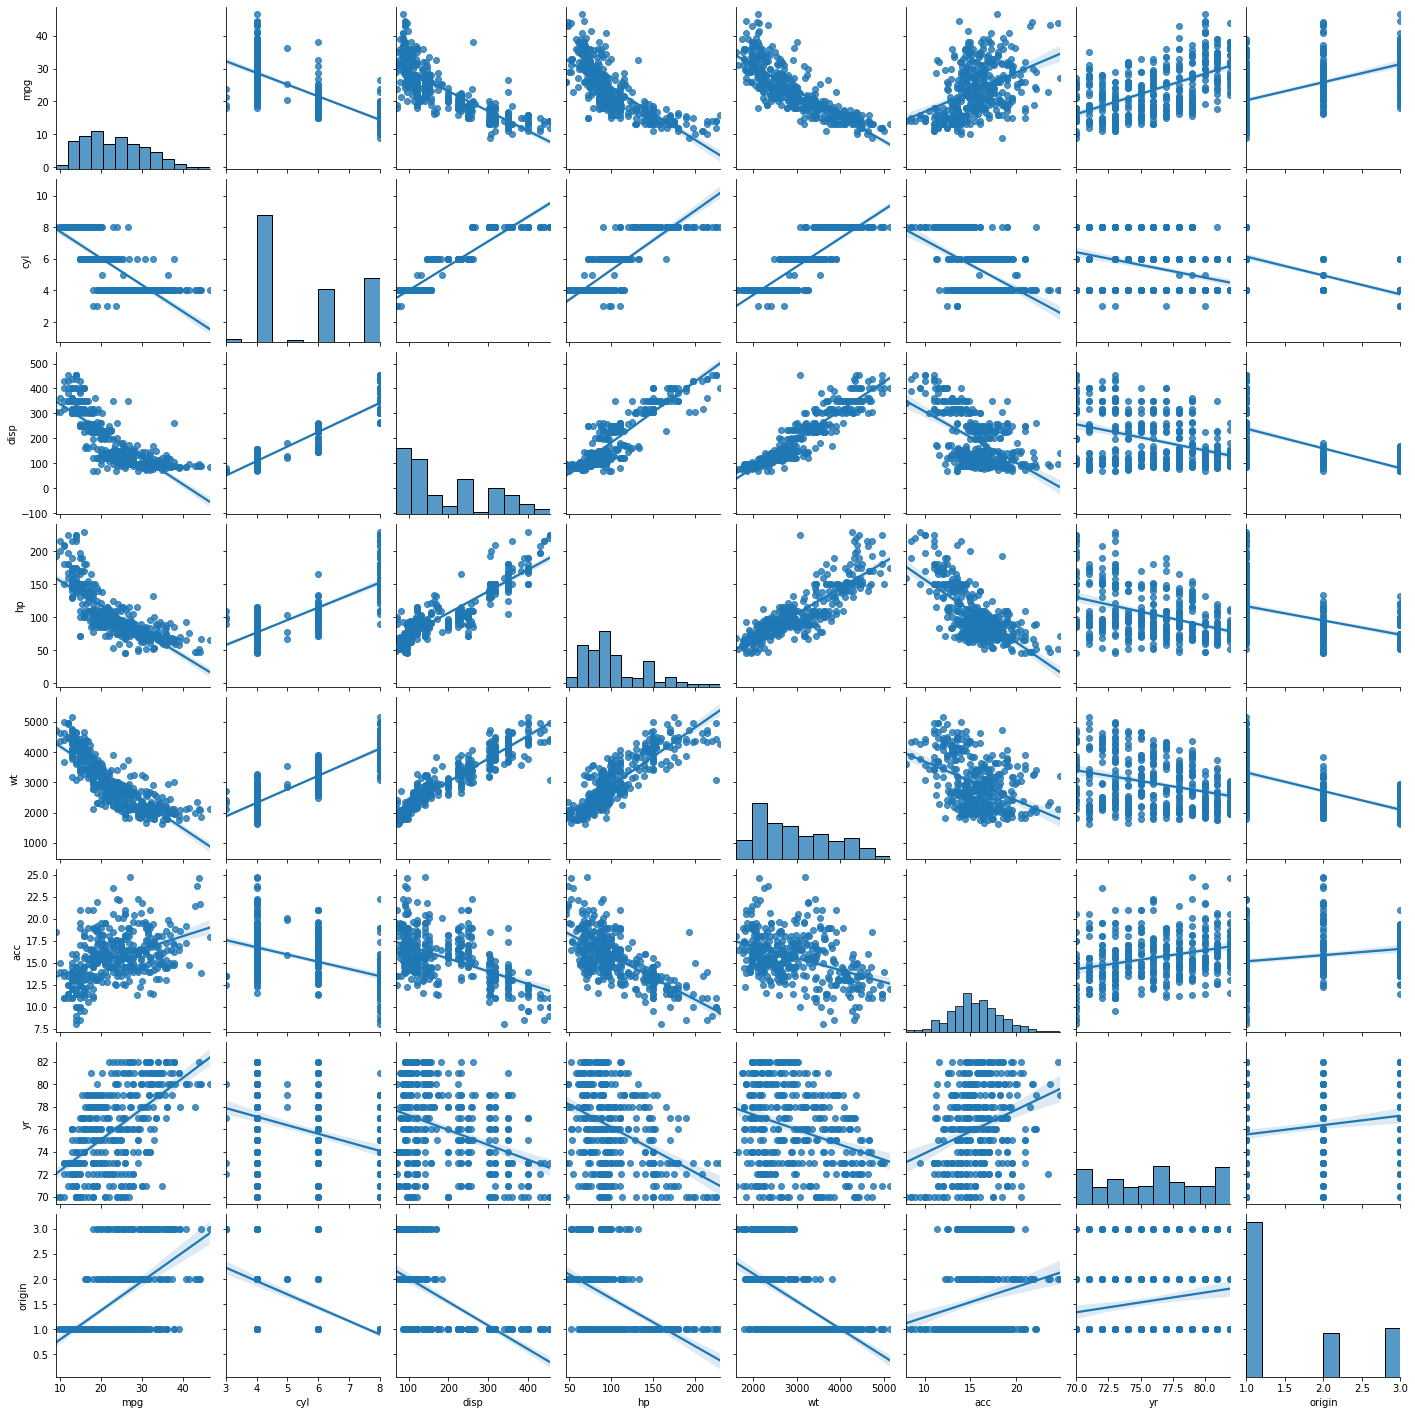

In [11]:
# plots scatter plots for every pair of attributes and histograms along the diagonal
sns.pairplot(dataframe, kind="reg")  
plt.show()

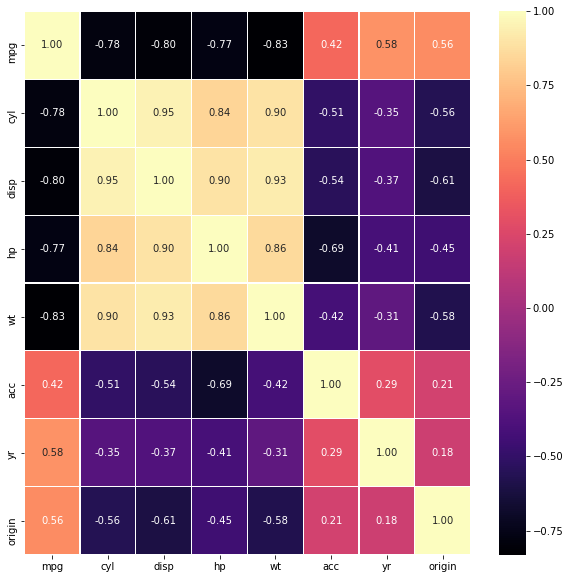

In [12]:
# the color intensity 
fig,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(dataframe.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma") 
plt.show()

Following are the observations from above 2 maps:
1. Very Strong Co-relation between wt vs cyl, hp and disp, and hp vs wt, and disp and cyl(0.84 or above)
2. Mild Co-relation between mpg VS  acc, yr, and origin(0.42 to 0.56 )
3. Weak Co-relation between originvs yr, and acc and yr vs acc(0.29 to 0.01)
4. Mild negative Co-relation between yr vs cyl, dis, and wt.(0 to -0.4)
5. Strong negative Co-relation between origin vs cyl, disp, hp, and wt and acc vs cyl, disp, hp, and wt(-0.4 or below)

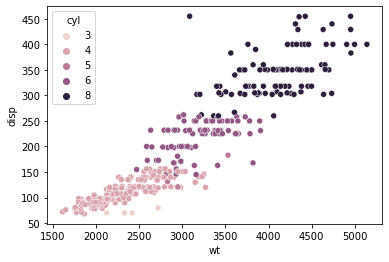

In [13]:
#Visualize a scatterplot for ‘wt’ and ‘disp’. Datapoints are distinguishable by ‘cyl’
sns.scatterplot(x="wt",y="disp",hue="cyl",data=dataframe)
plt.show()

There is a stong corelation between ‘wt’ and ‘disp’ about 0.5  and 6 or above cyl give higher displacement and and wt where as 3 to 4 cyl have low disp and wt.

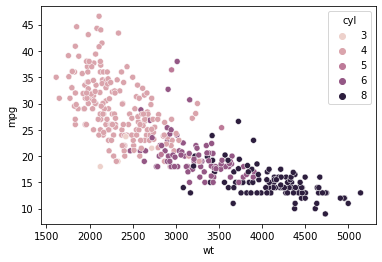

In [14]:
#Visualize a scatterplot for ‘wt’ and ‘mpg’. Datapoints are distinguishable by ‘cyl’
sns.scatterplot(x="wt",y="mpg",hue="cyl",data=dataframe)
plt.show()

‘wt’ and ‘mpg’ have stong negative corelation. Futhermore Cyl is low for high mpg and low wt and high for high wt and low mpg.

In [15]:
# Creating an object for the StandardScaler function to normailze the values
XScaler = StandardScaler()
scaled_df = XScaler.fit_transform(dataframe.iloc[:,1:9])
scaled_df

array([[-0.7064387 ,  1.49819126,  1.0906037 , ..., -1.29549834,
        -1.62742629, -0.71514478],
       [-1.09075062,  1.49819126,  1.5035143 , ..., -1.47703779,
        -1.62742629, -0.71514478],
       [-0.7064387 ,  1.49819126,  1.19623199, ..., -1.65857724,
        -1.62742629, -0.71514478],
       ...,
       [ 1.08701694, -0.85632057, -0.56103873, ..., -1.4407299 ,
         1.62198339, -0.71514478],
       [ 0.57460104, -0.85632057, -0.70507731, ...,  1.10082237,
         1.62198339, -0.71514478],
       [ 0.95891297, -0.85632057, -0.71467988, ...,  1.39128549,
         1.62198339, -0.71514478]])

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

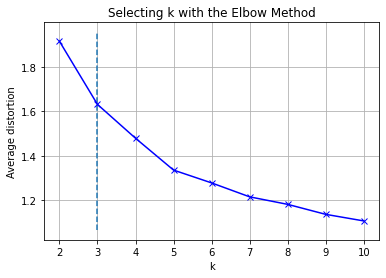

In [16]:
#Apply K-Means clustering for 2 to 10 clusters.
#Plot a visual and find elbow point. 
#On the above visual, highlight which are the possible Elbow points. 
#Finding optimal no. of clusters
clusters=range(2,11)
meanDistortions=[]

#forming models for 2 to 10
for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(scaled_df)
    prediction=model.predict(scaled_df)
    meanDistortions.append(sum(np.min(cdist(scaled_df, model.cluster_centers_, 'euclidean'), axis=1)) / scaled_df.shape[0])

# ploting visual and find elbow point
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.grid()
plt.vlines(3, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

For the graph its clear that k=3 is the best value to use

In [17]:
#Train a K-means clustering model once again on the optimal number of clusters.
# Let us first start with K = 3
final_model=KMeans(3)
final_model.fit(scaled_df)
prediction=final_model.predict(scaled_df)
dataframe['cluster'] = final_model.fit_predict(scaled_df)
labels=final_model.labels_
test=silhouette_score(scaled_df,labels)
print("silhouette_score: %1.4f" %test)
#Append the prediction 
dataframe["GROUP"] = prediction
print("Groups Assigned : \n")
dataframe.head(3)

silhouette_score: 0.3247
Groups Assigned : 



,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin,cluster,GROUP
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1,0,0
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1,0,0
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1,0,0


In [18]:
#Add a new feature in the DataFrame which will have labels based upon cluster value. [2 Marks]
dfClust = dataframe.groupby(['GROUP'])
dfClust.mean()

,mpg,cyl,disp,hp,wt,acc,yr,origin,cluster
GROUP,,,,,,,,,
0,14.71500,7.980000,346.370000,160.550000,4126.910000,12.721000,73.750000,1.000000,0
1,30.52795,4.068323,103.422360,77.372671,2234.720497,16.311801,77.155280,2.341615,1
2,21.69562,5.240876,187.558394,94.897810,2990.861314,16.772263,76.313869,1.087591,2


<AxesSubplot:xlabel='cen_x', ylabel='cen_y'>

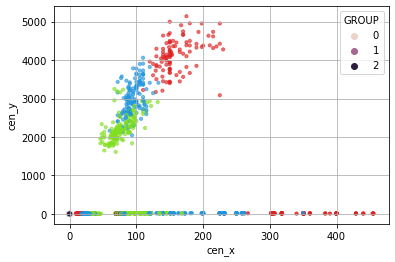

In [19]:
#Plot a visual and color the datapoints based upon clusters
# get centroids
centroids = final_model.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
## add to df
dataframe['cen_x'] = dataframe.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
dataframe['cen_y'] = dataframe.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})
# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF']
dataframe['c'] = dataframe.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})
plt.scatter(dataframe.hp, dataframe.wt, c=dataframe.c, alpha = 0.6, s=10)
plt.grid()
plt.scatter(dataframe.mpg, dataframe.cyl, c=dataframe.c, alpha = 0.8, s=10)
plt.scatter(dataframe.disp, dataframe.acc, c=dataframe.c, alpha = 0.8, s=10)
plt.scatter(dataframe.yr, dataframe.origin, c=dataframe.c, alpha = 0.8, s=10)
sns.scatterplot(x="cen_x",y="cen_y",hue="GROUP",data=dataframe)

Part 2

In [20]:
#Read ‘vehicle.csv’ and save as DataFrame
dataset=pd.read_csv("vehicle.csv")
dataset.head(5)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [21]:
#5 point summary
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.0,119.0
circularity,841.0,44.828775,6.152172,33.0,40.00,44.0,49.0,59.0
distance_circularity,842.0,82.110451,15.778292,40.0,70.00,80.0,98.0,112.0
radius_ratio,840.0,168.888095,33.520198,104.0,141.00,167.0,195.0,333.0
pr.axis_aspect_ratio,844.0,61.678910,7.891463,47.0,57.00,61.0,65.0,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.0,55.0
scatter_ratio,845.0,168.901775,33.214848,112.0,147.00,157.0,198.0,265.0
elongatedness,845.0,40.933728,7.816186,26.0,33.00,43.0,46.0,61.0
pr.axis_rectangularity,843.0,20.582444,2.592933,17.0,19.00,20.0,23.0,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.0,188.0


In [22]:
#display dataset
dataset.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [23]:
#Check percentage of missing values and impute with correct approach
(((dataset.isna().sum())/846)*100)

compactness                    0.000000
circularity                    0.591017
distance_circularity           0.472813
radius_ratio                   0.709220
pr.axis_aspect_ratio           0.236407
max.length_aspect_ratio        0.000000
scatter_ratio                  0.118203
elongatedness                  0.118203
pr.axis_rectangularity         0.354610
max.length_rectangularity      0.000000
scaled_variance                0.354610
scaled_variance.1              0.236407
scaled_radius_of_gyration      0.236407
scaled_radius_of_gyration.1    0.472813
skewness_about                 0.709220
skewness_about.1               0.118203
skewness_about.2               0.118203
hollows_ratio                  0.000000
class                          0.000000
dtype: float64

In [24]:
dataset=dataset.dropna()
(((dataset.isna().sum())/813)*100)

compactness                    0.0
circularity                    0.0
distance_circularity           0.0
radius_ratio                   0.0
pr.axis_aspect_ratio           0.0
max.length_aspect_ratio        0.0
scatter_ratio                  0.0
elongatedness                  0.0
pr.axis_rectangularity         0.0
max.length_rectangularity      0.0
scaled_variance                0.0
scaled_variance.1              0.0
scaled_radius_of_gyration      0.0
scaled_radius_of_gyration.1    0.0
skewness_about                 0.0
skewness_about.1               0.0
skewness_about.2               0.0
hollows_ratio                  0.0
class                          0.0
dtype: float64

Text(0.5, 1.0, '% of class')

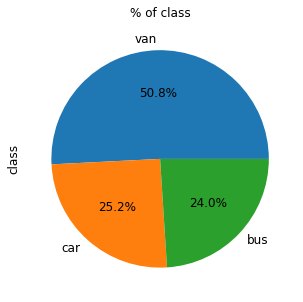

In [25]:
#Visualize a Pie-chart and print percentage of values for variable ‘class
lab=dataset['class'].unique()
ax = (dataset['class'].value_counts()*100.0 /len(dataset))\
.plot.pie(autopct='%.1f%%', labels = lab,figsize =(5,5), fontsize = 12 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('class',fontsize = 12)
ax.set_title('% of class', fontsize = 12)

In [26]:
#Check for duplicate rows in the data and impute with correct approach
dataset.duplicated().sum()

0

In [27]:
#encoding the catagorical values (target variable 0 is bus,1 is car and 2 is van  )
dataset['class']=dataset['class'].astype('category')
dataset['class']=dataset['class'].cat.codes
dataset.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,2
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,2
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,1
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,2
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,0


In [28]:
#Split data into X and Y. [Train and Test optional] 
#Standardize the Data
X=dataset.drop('class', axis=1)
y=dataset['class']
X_Scaler = StandardScaler()
X_scaled = X_Scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)

In [29]:
#Train a base Classification model using SVM
clf = svm.SVC(gamma=0.010, C=95) 
clf.fit(X_train , y_train)
y_predict = clf.predict(X_test)
print("Accuracy : %1.4f " %(accuracy_score(y_test, y_predict)*100))

Accuracy : 98.5294 


<AxesSubplot:>

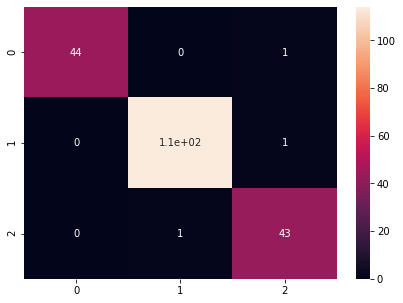

In [30]:
#Print Classification metrics for train data
df_cm= confusion_matrix(y_test, y_predict)
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [31]:
#Apply PCA on the data with 10 components

pca = PCA(n_components=10)
pca.fit(X_train)
print(pca.explained_variance_)

[9.04335919 2.89699468 1.46619585 1.14786192 0.90628134 0.50880763
 0.37203138 0.22384633 0.14904434 0.09074437]


In [32]:
print(pca.components_)

[[ 0.27891624  0.29245726  0.29885114  0.27382873  0.08635922  0.09493845
   0.31726109 -0.31508357  0.31552531  0.27545045  0.31113121  0.31515589
   0.27082144 -0.02457604  0.03437345  0.04111568  0.0357423   0.07952356]
 [-0.10612641  0.13873753 -0.06886322 -0.20227747 -0.14830714  0.00445636
   0.04724422  0.01560736  0.05873613  0.12809687  0.06175754  0.05100378
   0.21290538  0.48528338 -0.03390195 -0.10128721 -0.53697288 -0.54082271]
 [-0.13698898 -0.0259623  -0.06039287  0.28506645  0.65861892  0.50450392
  -0.09652468  0.04459147 -0.11839396 -0.02502544  0.08082974 -0.1083533
  -0.01868051  0.34143428 -0.17440285 -0.11975823  0.01602392  0.03438782]
 [ 0.08919455  0.17407143 -0.07603893 -0.03500985  0.04441813  0.04323245
  -0.09701569  0.08935293 -0.09585563  0.17085305 -0.11215216 -0.09233608
   0.18916877 -0.05421847  0.62906838 -0.653095    0.10468562  0.04550906]
 [ 0.0724044  -0.10124633  0.05049821 -0.01359679  0.01118989  0.25423202
  -0.02066678  0.06764675 -0.004105

In [33]:
print(pca.explained_variance_ratio_)

[0.53220132 0.17048802 0.08628557 0.06755163 0.05333462 0.02994331
 0.02189403 0.01317335 0.00877125 0.0053403 ]


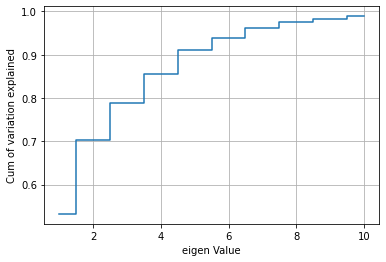

In [34]:
#Visualize Cumulative Variance Explained with Number of Components.
plt.step(list(range(1,11)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.grid()
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

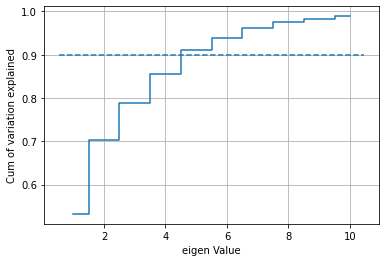

In [35]:
#Draw a horizontal line on the above plot to highlight the threshold of 90%. 
plt.step(list(range(1,11)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.grid()
plt.hlines(0.9, plt.xlim()[0], plt.xlim()[1], linestyles='dashed')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

In [36]:
# generating the covariance matrix and the eigen values for the PCA analysis
cov_matrix = np.cov(X_train.T) # the relevanat covariance matrix
print('Covariance Matrix \n%s', cov_matrix)

#generating the eigen values and the eigen vectors
e_vals, e_vecs = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)

Covariance Matrix 
%s [[ 0.98621165  0.66488994  0.74968579  0.68575141  0.11470963  0.18160624
   0.79240079 -0.76330049  0.79936622  0.64259037  0.75235691  0.80090051
   0.56558423 -0.22028526  0.21538042  0.09360533  0.27154836  0.33561561]
 [ 0.66488994  0.95792041  0.74068004  0.6035033   0.15670671  0.23466846
   0.81672038 -0.78711017  0.81817191  0.91026402  0.77242713  0.81102215
   0.90328619  0.05926866  0.12131505 -0.0504014  -0.10163155  0.04032551]
 [ 0.74968579  0.74068004  0.93326008  0.74694404  0.18016457  0.26945207
   0.85560303 -0.86142395  0.84923508  0.70558656  0.82120223  0.8400519
   0.66012155 -0.2185633   0.08821073  0.20977568  0.14098623  0.32756852]
 [ 0.68575141  0.6035033   0.74694404  0.97444977  0.615889    0.36211324
   0.73176953 -0.78929895  0.7080114   0.53995856  0.78498053  0.72117431
   0.52696978 -0.20402871  0.02714351  0.12025068  0.40045527  0.48443222]
 [ 0.11470963  0.15670671  0.18016457  0.615889    0.85499688  0.44595409
   0.13161873

In [37]:
# the "cumulative variance explained" analysis 
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 53.22013167  70.26893344  78.89748997  85.65265266  90.98611465
  93.98044548  96.16984865  97.48718337  98.36430868  98.89833892
  99.23790195  99.47079452  99.66937771  99.79026852  99.88420447
  99.960641    99.99788955 100.        ]


In [38]:
#Apply PCA on the data. This time Select Minimum Components
pca = PCA(n_components=0.9)
pca.fit(X_scaled)
print(pca.explained_variance_)
eigen_pairs = [(np.abs(e_vals[i]), e_vecs[:,i]) for i in range(len(e_vals))]
eigen_pairs.sort(reverse=True)
eigen_pairs[:5]
# generating dimensionally reduced datasets
w = np.hstack((eigen_pairs[0][1].reshape(18,1), 
                      eigen_pairs[1][1].reshape(18,1)))
print('Matrix W:\n', w)
X_scaled_pca = X_train.dot(w)
X_test_pca = X_test.dot(w)

[9.453387   2.98961888 1.91768721 1.17011696 0.92909452]
Matrix W:
 [[-0.27891624 -0.10612641]
 [-0.29245726  0.13873753]
 [-0.29885114 -0.06886322]
 [-0.27382873 -0.20227747]
 [-0.08635922 -0.14830714]
 [-0.09493845  0.00445636]
 [-0.31726109  0.04724422]
 [ 0.31508357  0.01560736]
 [-0.31552531  0.05873613]
 [-0.27545045  0.12809687]
 [-0.31113121  0.06175754]
 [-0.31515589  0.05100378]
 [-0.27082144  0.21290538]
 [ 0.02457604  0.48528338]
 [-0.03437345 -0.03390195]
 [-0.04111568 -0.10128721]
 [-0.0357423  -0.53697288]
 [-0.07952356 -0.54082271]]


In [39]:
#shape of x and y
X_scaled_pca.shape, w.shape, X_test_pca.shape

((609, 2), (18, 2), (204, 2))

In [40]:
#Train SVM model on components selected from above step.
clf = svm.SVC(gamma=0.010, C=95) 
clf.fit(X_train, y_train)
print ('Before PCA score', clf.score(X_test, y_test))

clf.fit(X_scaled_pca, y_train)
y_predict= clf.predict(X_test_pca)
print ('After PCA score', clf.score(X_test_pca, y_test))

Before PCA score 0.9852941176470589
After PCA score 0.6274509803921569


<AxesSubplot:>

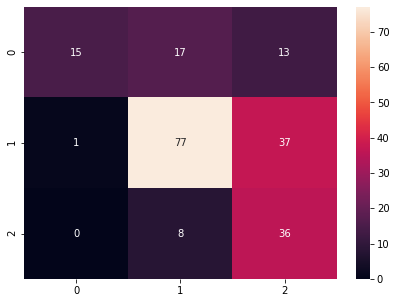

In [41]:
#Print Classification metrics for train data of above model and share insights. 
df_cm= confusion_matrix(y_test, y_predict)
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [42]:
#Train another SVM on the components out of PCA. Tune the parameters to improve performance
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_scaled_pca, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.0

[CV 2/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 3/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 4/5] END ...............

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [43]:
# print best parameter after tuning
print(grid.best_params_)

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}


In [44]:
# print how our model looks after hyper-parameter tuning
print(grid.best_score_)

0.7012328952716433


<AxesSubplot:>

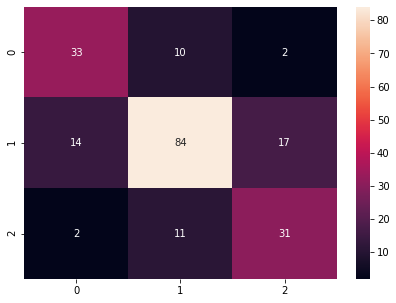

In [45]:
#Print Classification metrics for train data of above model and share relative improvement in performance in all the models along with insights
y_predict= grid.predict(X_test_pca)
df_cm= confusion_matrix(y_test, y_predict)
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

There is 8% improvement form before.

Explain pre-requisite/assumptions of PCA

• There must be linearity in the data set, i.e. the variables combine in a linear manner to form the dataset. The variables exhibit relationships among themselves.

• PCA assumes that the principal component with high variance must be paid attention and the PCs with lower variance are disregarded as noise. Pearson correlation coefficient framework led to the origin of PCA, and there it was assumed first that the axes with high variance would only be turned into principal components.

• All variables should be accessed on the same ratio level of measurement. The most preferred norm is at least 150 observations of the sample set with a ratio measurement of 5:1.

• Extreme values that deviate from other data points in any dataset, which are also called outliers, should be less. More number of outliers will represent experimental errors and will degrade your ML model/algorithm.

• The feature set must be correlated and the reduced feature set after applying PCA will represent the original data set but in an effective way with fewer dimensions.

Explain advantages and limitations of PCA

Advantages of Principal Component Analysis
1. Removes Correlated Features:

In a real-world scenario, this is very common that you get thousands of features in your dataset. You cannot run your algorithm on all the features as it will reduce the performance of your algorithm and it will not be easy to visualize that many features in any kind of graph. So, you MUST reduce the number of features in your dataset.

You need to find out the correlation among the features (correlated variables). Finding correlation manually in thousands of features is nearly impossible, frustrating and time-consuming. PCA does this for you efficiently.

After implementing the PCA on your dataset, all the Principal Components are independent of one another. There is no correlation among them.

2. Improves Algorithm Performance: 

With so many features, the performance of your algorithm will drastically degrade. PCA is a very common way to speed up your Machine Learning algorithm by getting rid of correlated variables which don’t contribute in any decision making. The training
Principal Component Analysis (i2tutorials)
Top Machine learning interview questions and answers October 1, 2019
What are the Pros and cons of the PCA?
Advantages of Principal Component Analysis
1. Removes Correlated Features:

In a real-world scenario, this is very common that you get thousands of features in your dataset. You cannot run your algorithm on all the features as it will reduce the performance of your algorithm and it will not be easy to visualize that many features in any kind of graph. So, you MUST reduce the number of features in your dataset.

You need to find out the correlation among the features (correlated variables). Finding correlation manually in thousands of features is nearly impossible, frustrating and time-consuming. PCA does this for you efficiently.

After implementing the PCA on your dataset, all the Principal Components are independent of one another. There is no correlation among them.

2. Improves Algorithm Performance: 

With so many features, the performance of your algorithm will drastically degrade. PCA is a very common way to speed up your Machine Learning algorithm by getting rid of correlated variables which don’t contribute in any decision making. The training time of the algorithms reduces significantly with less number of features.

So, if the input dimensions are too high, then using PCA to speed up the algorithm is a reasonable choice.

3. Reduces Overfitting: 

Overfitting mainly occurs when there are too many variables in the dataset. So, PCA helps in overcoming the overfitting issue by reducing the number of features.

4. Improves Visualization: 

It is very hard to visualize and understand the data in high dimensions. PCA transforms a high dimensional data to low dimensional data (2 dimension) so that it can be visualized easily.

We can use 2D Scree Plot to see which Principal Components result in high variance and have more impact as compared to other Principal Components.

Even the simplest IRIS dataset is 4 dimensional which is hard to visualize. We can use PCA to reduce it to 2-dimension for better visualization.


Disadvantages of Principal Component Analysis
1. Independent variables become less interpretable:

After implementing PCA on the dataset, your original features will turn into Principal Components. Principal Components are the linear combination of your original features. Principal Components are not as readable and interpretable as original features.

2. Data standardization is must before PCA: 

You must standardize your data before implementing PCA, otherwise PCA will not be able to find the optimal Principal Components.

For instance, if a feature set has data expressed in units of Kilograms, Light years, or Millions, the variance scale is huge in the training set. If PCA is applied on such a feature set, the resultant loadings for features with high variance will also be large. Hence, principal components will be biased towards features with high variance, leading to false results.

Also, for standardization, all the categorical features are required to be converted into numerical features before PCA can be applied.

PCA is affected by scale, so you need to scale the features in your data before applying PCA. Use StandardScaler from Scikit Learn to standardize the dataset features onto unit scale (mean = 0 and standard deviation = 1) which is a requirement for the optimal performance of many Machine Learning algorithms.

3. Information Loss: 

Although Principal Components try to cover maximum variance among the features in a dataset, if we don’t select the number of Principal Components with care, it may miss some information as compared to the original list of features.
